Found 36 matching cluster pairs


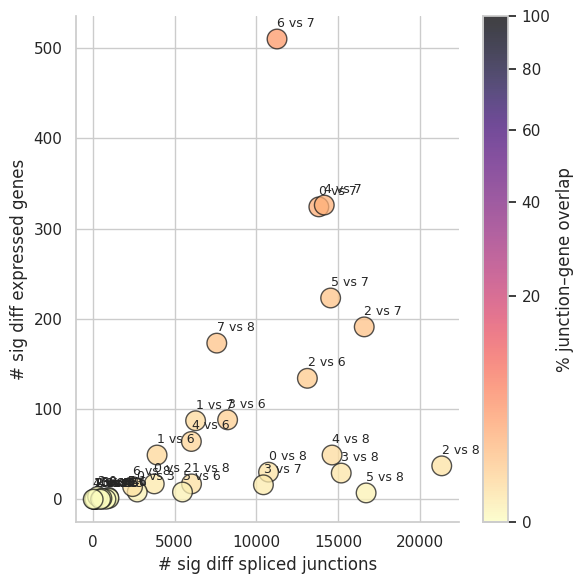

In [23]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# %%
# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251111_165619__MVISP_models__SCVI_model/")  # change this
ds_pattern = re.compile(r"DSsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
de_pattern = re.compile(r"DEsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")

# %%
# === COLLECT FILES ===
ds_files = {m.groups(): f for f in base_dir.glob("DSsig_*.csv")
             if (m := ds_pattern.search(f.name))}
de_files = {m.groups(): f for f in base_dir.glob("DEsig_*.csv")
             if (m := de_pattern.search(f.name))}

pairs = sorted(set(ds_files) & set(de_files))
print(f"Found {len(pairs)} matching cluster pairs")

# %%
records = []
for pair in pairs:
    ds_df = pd.read_csv(ds_files[pair])
    de_df = pd.read_csv(de_files[pair], index_col=0)

    n_ds = len(ds_df)
    n_de = len(de_df)

    # list of gene names (keep duplicates)
    ds_gene_list = ds_df["gene_name"].dropna().astype(str).tolist()
    # overlap percentage
    overlap_genes = [g for g in ds_gene_list if g in de_df.index]
    pct_overlap = 100 * len(overlap_genes) / len(ds_gene_list) if ds_gene_list else 0

    records.append({
        "pair": f"{pair[0]} vs {pair[1]}",
        "n_ds": n_ds,
        "n_de": n_de,
        "pct_overlap": pct_overlap
    })

summary = pd.DataFrame(records)
summary.head()

# %%
# === PLOT ===
sns.set(style="whitegrid", context="notebook")
fig, ax = plt.subplots(figsize=(6,6))
norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=100)

import matplotlib.colors as mcolors

sc = ax.scatter(
    summary["n_ds"], summary["n_de"],
    c=summary["pct_overlap"], cmap="magma_r", s=200, edgecolor="k", alpha = 0.75,
    norm=norm
)

for _, row in summary.iterrows():
    ax.text(row["n_ds"] + 10, row["n_de"] + 10, row["pair"], ha="left", va="bottom", fontsize=9)



cb = plt.colorbar(sc, ax=ax)
cb.set_label("% junction–gene overlap")
cb.set_ticks([0, 20, 40, 60, 80, 100])


ax.set_xlabel("# sig diff spliced junctions")
ax.set_ylabel("# sig diff expressed genes")

sns.despine()

plt.tight_layout()
plt.show()

# %%
# Optionally save summary table and figure
summary.to_csv(base_dir / "splicevi_summary.csv", index=False)
fig.savefig(base_dir / "splicevi_diffscatter.png", dpi=300, bbox_inches="tight")


Found 28 matching cluster pairs


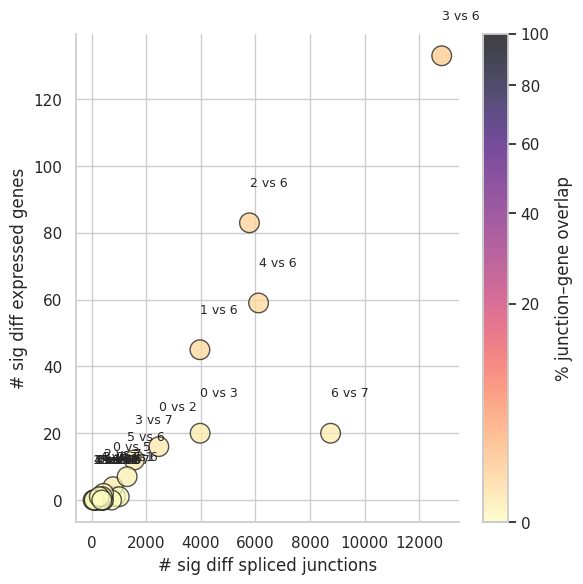

In [24]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re

# %%
# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251111_165619__MVISP_models__SCVI_model/")  # change this
ds_pattern = re.compile(r"DSsig_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
de_pattern = re.compile(r"DEsig_splicevi_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")

# %%
# === COLLECT FILES ===
ds_files = {m.groups(): f for f in base_dir.glob("DSsig_*.csv")
             if (m := ds_pattern.search(f.name))}
de_files = {m.groups(): f for f in base_dir.glob("DEsig_*.csv")
             if (m := de_pattern.search(f.name))}

pairs = sorted(set(ds_files) & set(de_files))
print(f"Found {len(pairs)} matching cluster pairs")

# %%
records = []
for pair in pairs:
    ds_df = pd.read_csv(ds_files[pair])
    de_df = pd.read_csv(de_files[pair], index_col=0)

    n_ds = len(ds_df)
    n_de = len(de_df)

    # list of gene names (keep duplicates)
    ds_gene_list = ds_df["gene_name"].dropna().astype(str).tolist()
    # overlap percentage
    overlap_genes = [g for g in ds_gene_list if g in de_df.index]
    pct_overlap = 100 * len(overlap_genes) / len(ds_gene_list) if ds_gene_list else 0

    records.append({
        "pair": f"{pair[0]} vs {pair[1]}",
        "n_ds": n_ds,
        "n_de": n_de,
        "pct_overlap": pct_overlap
    })

summary = pd.DataFrame(records)
summary.head()

# %%
# === PLOT ===
sns.set(style="whitegrid", context="notebook")
fig, ax = plt.subplots(figsize=(6,6))
norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=100)

import matplotlib.colors as mcolors

sc = ax.scatter(
    summary["n_ds"], summary["n_de"],
    c=summary["pct_overlap"], cmap="magma_r", s=200, edgecolor="k", alpha = 0.75,
    norm=norm
)

for _, row in summary.iterrows():
    ax.text(row["n_ds"] + 10, row["n_de"] + 10, row["pair"], ha="left", va="bottom", fontsize=9)



cb = plt.colorbar(sc, ax=ax)
cb.set_label("% junction–gene overlap")
cb.set_ticks([0, 20, 40, 60, 80, 100])


ax.set_xlabel("# sig diff spliced junctions")
ax.set_ylabel("# sig diff expressed genes")

sns.despine()

plt.tight_layout()
plt.show()

# %%
# Optionally save summary table and figure
summary.to_csv(base_dir / "splicevi_summary.csv", index=False)
fig.savefig(base_dir / "splicevi_diffscatter.png", dpi=300, bbox_inches="tight")


Found 36 matching cluster pairs for pattern DSsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv
Found 28 matching cluster pairs for pattern DSsig_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv


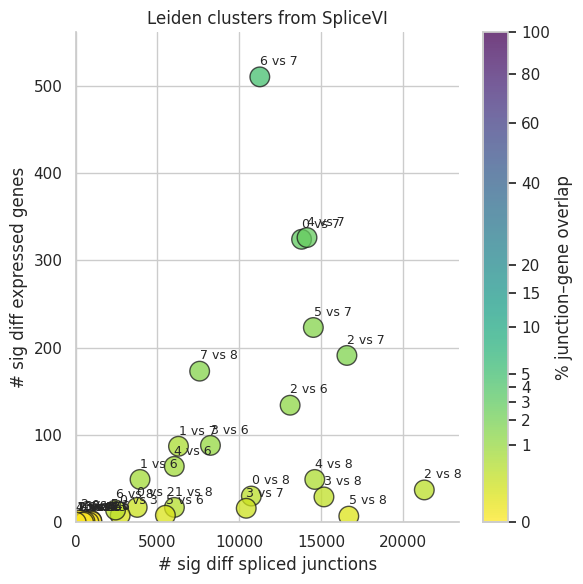

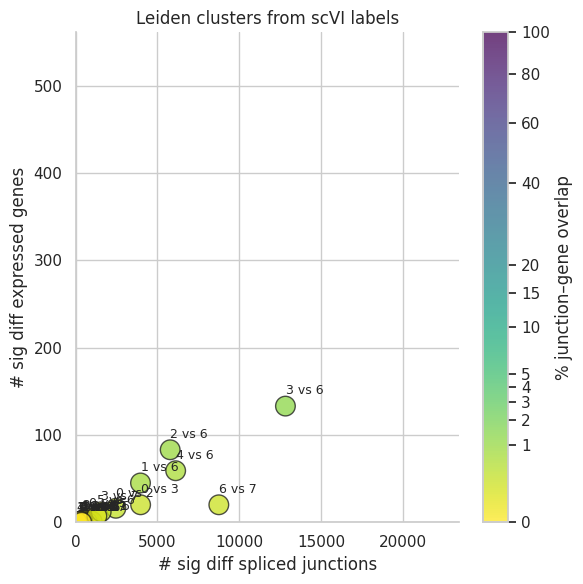

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from pathlib import Path
import re

# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251111_165619__MVISP_models__SCVI_model/")

def collect_summary(ds_pattern, de_pattern):
    ds_files = {m.groups(): f for f in base_dir.glob("DSsig_*.csv")
                 if (m := ds_pattern.search(f.name))}
    de_files = {m.groups(): f for f in base_dir.glob("DEsig_*.csv")
                 if (m := de_pattern.search(f.name))}

    pairs = sorted(set(ds_files) & set(de_files))
    print(f"Found {len(pairs)} matching cluster pairs for pattern {ds_pattern.pattern}")

    records = []
    for pair in pairs:
        ds_df = pd.read_csv(ds_files[pair])
        de_df = pd.read_csv(de_files[pair], index_col=0)

        n_ds = len(ds_df)
        n_de = len(de_df)
        ds_gene_list = ds_df["gene_name"].dropna().astype(str).tolist()
        overlap_genes = [g for g in ds_gene_list if g in de_df.index]
        pct_overlap = 100 * len(overlap_genes) / len(ds_gene_list) if ds_gene_list else 0

        records.append({
            "pair": f"{pair[0]} vs {pair[1]}",
            "n_ds": n_ds,
            "n_de": n_de,
            "pct_overlap": pct_overlap
        })
    return pd.DataFrame(records)


# === Collect both datasets ===
splicevi_ds_pattern = re.compile(r"DSsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
splicevi_de_pattern = re.compile(r"DEsig_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
scvi_ds_pattern = re.compile(r"DSsig_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")
scvi_de_pattern = re.compile(r"DEsig_splicevi_scviLabels_Cortical excitatory neuron_(\d+)_vs_(\d+)\.csv")

summary_splicevi = collect_summary(splicevi_ds_pattern, splicevi_de_pattern)
summary_scvi = collect_summary(scvi_ds_pattern, scvi_de_pattern)

# === Shared axis limits ===
xmax = max(summary_splicevi["n_ds"].max(), summary_scvi["n_ds"].max()) * 1.1
ymax = max(summary_splicevi["n_de"].max(), summary_scvi["n_de"].max()) * 1.1
norm = mcolors.PowerNorm(gamma=0.4, vmin=0, vmax=100)

# === Plot function ===
def make_plot(summary, title, save_name):
    sns.set(style="whitegrid", context="notebook")
    fig, ax = plt.subplots(figsize=(6,6))

    sc = ax.scatter(
        summary["n_ds"], summary["n_de"],
        c=summary["pct_overlap"], cmap="viridis_r",
        s=200, edgecolor="k", alpha=0.75,
        norm=norm
    )

    for _, row in summary.iterrows():
        ax.text(row["n_ds"] + 10, row["n_de"] + 10, row["pair"],
                ha="left", va="bottom", fontsize=9)

    cb = plt.colorbar(sc, ax=ax)
    cb.set_label("% junction–gene overlap")
    cb.set_ticks([0, 1, 2, 3, 4,  5, 10, 15, 20, 40, 60, 80, 100])

    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    ax.set_xlabel("# sig diff spliced junctions")
    ax.set_ylabel("# sig diff expressed genes")
    ax.set_title(title)

    sns.despine()
    plt.tight_layout()
    plt.show()

    fig.savefig(base_dir / save_name, dpi=300, bbox_inches="tight")


# === Generate both plots ===
make_plot(summary_splicevi, "Leiden clusters from SpliceVI", "splicevi_diffscatter.png")
make_plot(summary_scvi, "Leiden clusters from scVI labels", "scvi_diffscatter.png")


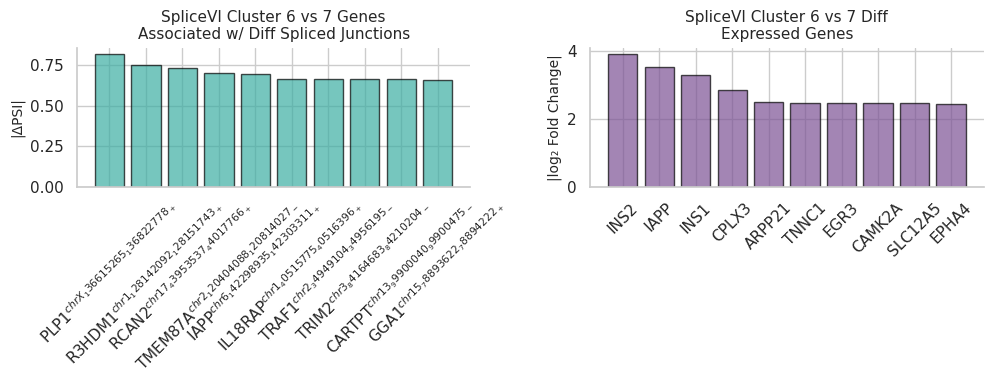

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === CONFIG ===
base_dir = Path("/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251111_165619__MVISP_models__SCVI_model/")
pair = ("6", "7")        # <-- change this to whichever clusters you want
top_n = 10               # number of top genes/junctions to plot

# === Load data ===
ds_file = base_dir / f"DSsig_Cortical excitatory neuron_{pair[0]}_vs_{pair[1]}.csv"
de_file = base_dir / f"DEsig_Cortical excitatory neuron_{pair[0]}_vs_{pair[1]}.csv"

ds_df = pd.read_csv(ds_file)
de_df = pd.read_csv(de_file, index_col=0)

# === Compute absolute effect magnitudes ===
if "effect_size" in ds_df.columns:
    ds_df["abs_effect"] = ds_df["effect_size"].abs()
else:
    # fallback if effect_size doesn't exist — use |scale2 - scale1|
    ds_df["abs_effect"] = (ds_df["scale2"] - ds_df["scale1"]).abs()

de_df["abs_effect"] = de_df["lfc_mean"].abs()

# === Sort and select top N spliced junctions / expressed genes ===
ds_top = ds_df.sort_values("abs_effect", ascending=False).head(top_n)
de_top = de_df.sort_values("abs_effect", ascending=False).head(top_n)

# === Get all DE gene names (not just top N) ===
all_de_genes = set(de_df.index.astype(str))

# === Annotate DS genes with stars if NOT DE ===
ds_top = ds_top.rename(columns={"gene_name": "gene"})
ds_top["gene"] = ds_top["gene"].astype(str)
def make_label(gene, junction_id):
    short_id = junction_id
    return rf"{gene}$^{{{short_id}}}$"

ds_top["gene_label"] = ds_top.apply(
    lambda r: make_label(str(r["gene"]), str(r["junction_id"])), axis=1
)


de_top["gene"] = de_top.index.astype(str)

# === Plot ===
sns.set(style="whitegrid", context="notebook")
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=False)

# Left: Differential splicing
axes[0].bar(
    ds_top["gene_label"],
    ds_top["abs_effect"],
    color="#3CAEA3", edgecolor="black", alpha=0.7
)
axes[0].set_title(f"SpliceVI Cluster {pair[0]} vs {pair[1]} Genes\nAssociated w/ Diff Spliced Junctions", fontsize=11)
axes[0].set_ylabel("|ΔPSI|", fontsize=10)
axes[0].tick_params(axis="x", rotation=45)

# Right: Differential expression
axes[1].bar(
    de_top["gene"],
    de_top["abs_effect"],
    color="#7C5295", edgecolor="black", alpha=0.7
)
axes[1].set_title(f"SpliceVI Cluster {pair[0]} vs {pair[1]} Diff\nExpressed Genes", fontsize=11)
axes[1].set_ylabel("|log₂ Fold Change|", fontsize=10)
axes[1].tick_params(axis="x", rotation=45)

sns.despine()
plt.tight_layout()
plt.show()

# Optional save
fig.savefig(base_dir / f"barplot_pair_{pair[0]}_vs_{pair[1]}.png", dpi=300, bbox_inches="tight")



In [ ]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import mudata as mu
import scanpy as sc
import scvi

# === USER INPUTS ===


MODEL_DIR="/gpfs/commons/home/svaidyanathan/splice_vi_partial_vae_sweep/batch_20251105_181440/mouse_trainandtest_REAL_cd=32_mn=50000_ld=25_lr=1e-5_0_scatter_PartialEncoderEDDI_pool=sum/models"
SCVI_MODEL_DIR="/gpfs/commons/home/svaidyanathan/scvi_age/model"

MUDATA_PATH="/gpfs/commons/groups/knowles_lab/Karin/Leaflet-analysis-WD/MOUSE_SPLICING_FOUNDATION/MODEL_INPUT/102025/train_70_30_model_ready_combined_gene_expression_aligned_splicing_20251009_024406.h5mu"
BASE_OUTDIR="/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs"

mdata_path = MUDATA_PATH    # <— set this
model_path =MODEL_DIR  # <— set this (directory you saved to)
labels_csv_path = "/gpfs/commons/home/svaidyanathan/analysis/subcluster_outputs/20251111_165619__MVISP_models__SCVI_model/leiden_joint_labels.csv"

# choose one or more subcluster pairs (strings to match label values)
pairs = [("6", "7")]    # e.g., [("6","7"), ("0","3")]
junction_id = "chrX_136615265_136822778_+"  # <— set this to a DS junction of interest



# column names in labels CSV (adjust if yours differ)
cell_id_col = "cell_id"
cluster_col = "leiden_joint"   # or "leiden_joint" if that’s the column in your CSV

# plotting options
palette_groups = ["#1f77b4", "#ff7f0e"]  # A/B
dpi = 200

# === LOAD DATA ===
mdata = mu.read_h5mu(mdata_path)
ad_sp = mdata["splicing"]
ad_rna = mdata["rna"]

In [ ]:

# find matching rows
j_id = str(junction_id)
match_rows = ad_sp.var.index[ad_sp.var["junction_id"] == j_id].tolist()

ad_sp.var["junction_id"] = ad_sp.var["junction_id"].astype(str)

if len(match_rows) == 0:
    raise ValueError(f"junction_id '{j_id}' not found in ad_sp.var['junction_id']")
elif len(match_rows) > 1:
    print(f"Warning: junction_id '{j_id}' maps to multiple var rows. Using the first.")
var_name = match_rows[0] 



In [ ]:


labels_df = pd.read_csv(labels_csv_path)
if cell_id_col not in labels_df.columns:
    # fallback guess
    maybe = [c for c in labels_df.columns if "cell" in c.lower() and "id" in c.lower()]
    cell_id_col = maybe[0] if maybe else labels_df.columns[0]
if cluster_col not in labels_df.columns:
    cluster_col = labels_df.columns[-1]

labels_df[cell_id_col] = labels_df[cell_id_col].astype(str)
obs_names = mdata.obs_names.astype(str)
labels_df = labels_df[labels_df[cell_id_col].isin(obs_names)].copy()

# junction -> ATSE and gene
if "event_id" not in ad_sp.var.columns:
    raise KeyError("Expected mdata['splicing'].var['event_id'] to exist.")
if "gene_name" not in ad_sp.var.columns:
    raise KeyError("Expected mdata['splicing'].var['gene_name'] to exist.")
if junction_id not in ad_sp.var_names:
    raise KeyError(f"junction_id {junction_id} not found in mdata['splicing'].var_names")

event_id = ad_sp.var.loc[junction_id, "event_id"]
gene_name = ad_sp.var.loc[junction_id, "gene_name"]
atse_junctions = ad_sp.var.index[ad_sp.var["event_id"] == event_id].tolist()

print(f"Chosen junction: {junction_id}")
print(f"ATSE event_id: {event_id}  |  #junctions in event: {len(atse_junctions)}")
print(f"Associated gene: {gene_name}")

# === LOAD MULTIVISPLICE MODEL ===
# Replace the import path below with your actual package/module path if different.

model = scvi.model.MULTIVISPLICE.load(model_path, adata=mdata)

# helpers
def cell_indices_for_label(label_value: str) -> np.ndarray:
    cell_ids = labels_df.loc[labels_df[cluster_col].astype(str) == str(label_value), cell_id_col].astype(str)
    idx = pd.Index(obs_names).get_indexer(cell_ids)
    idx = idx[idx >= 0]
    return idx

def pair_title(a, b):
    return f"Cluster {a} vs {b}"

In [ ]:
# %%
sns.set(style="whitegrid", context="notebook")

for a, b in pairs:
    idx_a = cell_indices_for_label(a)
    idx_b = cell_indices_for_label(b)
    if len(idx_a) == 0 or len(idx_b) == 0:
        print(f"[skip] No cells for pair {a} vs {b}")
        continue

    # --- DM-normalized PSI* for the selected junction and its ATSE mates ---
    psi_a = model.get_normalized_splicing_DM(
        adata=mdata,
        indices=idx_a,
        junction_list=atse_junctions,
        use_z_mean=True,
        n_samples=1,
        return_mean=True,
        return_numpy=False,
        silent=True,
    )
    psi_b = model.get_normalized_splicing_DM(
        adata=mdata,
        indices=idx_b,
        junction_list=atse_junctions,
        use_z_mean=True,
        n_samples=1,
        return_mean=True,
        return_numpy=False,
        silent=True,
    )

    # long format for seaborn
    psi_a_m = psi_a.reset_index().melt(id_vars=psi_a.index.name or "index",
                                       var_name="junction_id", value_name="psi_star")
    psi_a_m["group"] = str(a)
    psi_b_m = psi_b.reset_index().melt(id_vars=psi_b.index.name or "index",
                                       var_name="junction_id", value_name="psi_star")
    psi_b_m["group"] = str(b)
    psi_long = pd.concat([psi_a_m, psi_b_m], ignore_index=True)

    # put the chosen junction first, then others by mean
    j_means = psi_long.groupby("junction_id")["psi_star"].mean().sort_values(ascending=False)
    j_order = [junction_id] + [j for j in j_means.index if j != junction_id]

    # --- normalized expression for the associated gene ---
    expr_long = None
    if gene_name in ad_rna.var_names:
        expr_a = model.get_normalized_expression(
            adata=mdata,
            indices=idx_a,
            gene_list=[gene_name],
            use_z_mean=True,
            n_samples=1,
            return_mean=True,
            return_numpy=False,
            silent=True,
        )
        expr_b = model.get_normalized_expression(
            adata=mdata,
            indices=idx_b,
            gene_list=[gene_name],
            use_z_mean=True,
            n_samples=1,
            return_mean=True,
            return_numpy=False,
            silent=True,
        )
        ea = expr_a.iloc[:, 0].rename("expr").to_frame(); ea["group"] = str(a)
        eb = expr_b.iloc[:, 0].rename("expr").to_frame(); eb["group"] = str(b)
        expr_long = pd.concat([ea, eb], axis=0).reset_index(drop=True)
    else:
        print(f"[warn] Gene {gene_name} not found in RNA var_names; skipping expression violin.")

    # --- PLOTS ---
    ncols = 2 if expr_long is not None else 1
    fig, axes = plt.subplots(1, ncols, figsize=(6*ncols, 4), dpi=dpi)
    if ncols == 1:
        axes = [axes]

    # Left: PSI* violins for ATSE
    ax0 = axes[0]
    sns.violinplot(
        data=psi_long,
        x="junction_id", y="psi_star", hue="group",
        order=j_order, cut=0, inner="quartile", scale="width",
        palette=palette_groups, ax=ax0
    )
    ax0.set_title(f"{pair_title(a,b)} — DM-normalized PSI* (ATSE)")
    ax0.set_xlabel("Junctions in ATSE (selected first)")
    ax0.set_ylabel("PSI*")
    ax0.legend(title="Cluster")
    for t in ax0.get_xticklabels():
        t.set_rotation(45); t.set_ha("right")

    # Right: normalized expression for the associated gene
    if expr_long is not None:
        ax1 = axes[1]
        sns.violinplot(
            data=expr_long, x="group", y="expr",
            order=[str(a), str(b)], cut=0, inner="quartile",
            palette=palette_groups, ax=ax1
        )
        ax1.set_title(f"{pair_title(a,b)} — normalized expression: {gene_name}")
        ax1.set_xlabel("Cluster"); ax1.set_ylabel("ρ")
        ax1.legend_.remove()

    plt.tight_layout()
    plt.show()
